# EN EN EN LİNEER REGR

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns


In [2]:
df=pd.read_csv("community_health.csv")

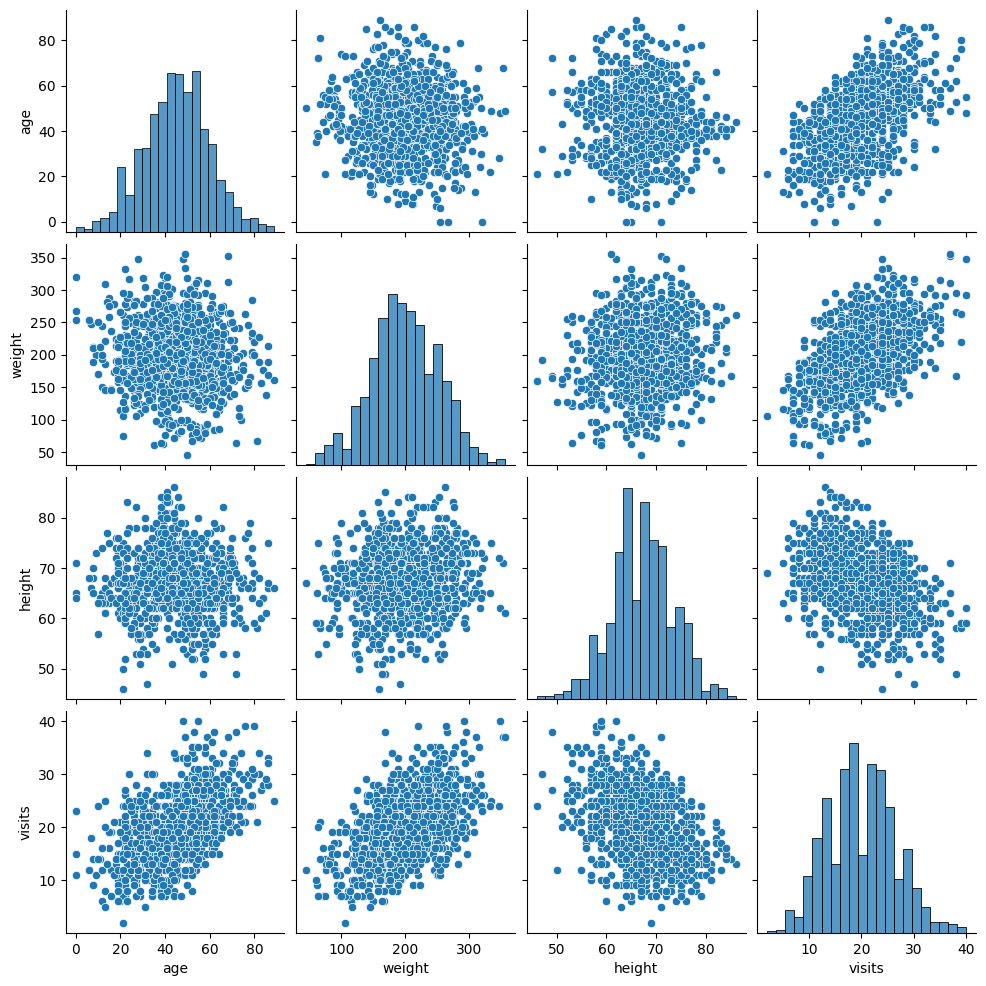

In [3]:
sns.pairplot(df)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             1000 non-null   int64 
 1   gender          1000 non-null   object
 2   race/ethnicity  1000 non-null   object
 3   weight          1000 non-null   int64 
 4   height          1000 non-null   int64 
 5   visits          1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [5]:
df.isnull().sum()

age               0
gender            0
race/ethnicity    0
weight            0
height            0
visits            0
dtype: int64

In [6]:
df.rename(
    columns={"age " : "yas",
             "gender": "cinsiyet",
             "race/ethnicity": "irk",
             "weight":"kilo",
             "height" : "boy"
             }, inplace=True
    )


In [7]:
df.head(5)

,age,cinsiyet,irk,kilo,boy,visits
0,47,female,group D,247,65,28
1,26,male,group C,283,66,23
2,26,male,group B,201,68,14
3,39,male,group C,237,73,21
4,55,male,group A,199,61,27


In [8]:
df["kilo"]  = round(df["kilo"] *0.45)

In [9]:
df["boy"] = round(df["boy"] * 2.54) 

In [10]:
df.head(5)

,age,cinsiyet,irk,kilo,boy,visits
0,47,female,group D,111.0,165.0,28
1,26,male,group C,127.0,168.0,23
2,26,male,group B,90.0,173.0,14
3,39,male,group C,107.0,185.0,21
4,55,male,group A,90.0,155.0,27


In [11]:
df["cinsiyet"] = df["cinsiyet"].replace({"female" : 0 , "male" : 1})

C:\Users\hdgn5\AppData\Local\Temp\ipykernel_11780\2097696629.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["cinsiyet"] = df["cinsiyet"].replace({"female" : 0 , "male" : 1})


In [12]:
df.head(5)

,age,cinsiyet,irk,kilo,boy,visits
0,47,0,group D,111.0,165.0,28
1,26,1,group C,127.0,168.0,23
2,26,1,group B,90.0,173.0,14
3,39,1,group C,107.0,185.0,21
4,55,1,group A,90.0,155.0,27


In [13]:

df["irk"] = df["irk"].replace({"group A" :1 ,"group B" : 2 , "group C" : 3 , "group D" :4 ,"group E" : 5})

C:\Users\hdgn5\AppData\Local\Temp\ipykernel_11780\2431372593.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["irk"] = df["irk"].replace({"group A" :1 ,"group B" : 2 , "group C" : 3 , "group D" :4 ,"group E" : 5})


In [14]:
df.head(5)

,age,cinsiyet,irk,kilo,boy,visits
0,47,0,4,111.0,165.0,28
1,26,1,3,127.0,168.0,23
2,26,1,2,90.0,173.0,14
3,39,1,3,107.0,185.0,21
4,55,1,1,90.0,155.0,27


# Train Test Split

In [15]:
x= df.drop("visits" , axis=1)
y= df["visits"]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.33 , random_state=99)

In [18]:
x_test.head()

,age,cinsiyet,irk,kilo,boy
890,72,1,2,87.0,175.0
983,47,0,2,79.0,183.0
107,16,0,2,107.0,170.0
609,34,0,2,61.0,168.0
113,50,1,2,132.0,170.0


In [19]:
X_train.head()

,age,cinsiyet,irk,kilo,boy
916,43,1,4,41.0,168.0
234,48,1,3,75.0,168.0
711,23,0,4,96.0,183.0
532,56,0,3,72.0,163.0
289,50,1,3,78.0,178.0


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
regr = LinearRegression()

In [22]:
regr.fit(X_train , y_train)

LinearRegression()

In [23]:
test_preds = regr.predict(x_test)

In [24]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

In [25]:
print("R^2 : ", round(r2_score(y_test,test_preds),2))
print("MAE :", round(mean_absolute_error(y_test,test_preds),2))
print("RMSE :", round(np.sqrt(mean_squared_error(y_test,test_preds)),2))


R^2 :  0.84
MAE : 2.21
RMSE : 2.62


In [26]:
insan=[[20 , 1,1,80,184 ]]

In [27]:
regr.predict(insan)

C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.80144167])

In [28]:
x.iloc[1]

age          26.0
cinsiyet      1.0
irk           3.0
kilo        127.0
boy         168.0
Name: 1, dtype: float64

In [29]:
y.head(5)

0    28
1    23
2    14
3    21
4    27
Name: visits, dtype: int64

In [30]:
x.head(3)

,age,cinsiyet,irk,kilo,boy
0,47,0,4,111.0,165.0
1,26,1,3,127.0,168.0
2,26,1,2,90.0,173.0


In [31]:
insan1=[[26 , 1,3,127,168 ]]

In [32]:
regr.predict(insan1)

C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([22.50706723])

In [33]:
y_hat= regr.predict(x)

In [34]:
resudial = y_hat - y

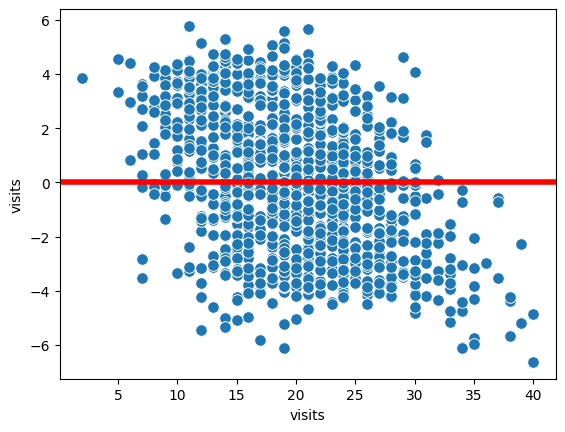

In [35]:
sns.scatterplot(x=y , y= resudial , s=70)
plt.axhline(y=0, color="r" , ls ="-" , lw =4)